## Data : Wine
 * wine 데이터

### 1. 데이터 불러오기
* 기본 패키지 불러오기

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

* 데이터 불러오기

In [2]:
wn  = pd.read_csv('winemag-data_first150k.csv')

In [3]:
wn.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
wn.rename(columns = {'Unnamed: 0' : 'index'},inplace = True)

<컬럼 설명>
* index : 고유 번호
* country : 생산 나라
* description : 설명
* designation : 소몰리에의 한줄평
* points : 점수
* price : 가격
* province : 생산 지역 혹은 주
* region_1 : 와인재배 지역
* region_2 : 와인재배의 구체적인 지역
* variety : 품종
* winery : 와인 양조장

### 2. 질문하기
* 나라별 와인평균 점수, 가격, 품종생산량, 효율성은 어떻게 되는가?
* 나라주별 와인 평균 점수, 가격, 효율성, 품종별은 어떻게 되는가?
* 품종별 가격, 점수는 어떠한가?
* 와인너리별 점수, 가격은 어떠한가?



### 3. 데이터 전처리
* 데이터 기본 정보 확인

In [5]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
wn.duplicated().sum()

0

In [7]:
wn.isnull().sum()

index              0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [8]:
wn['efficiency'] = wn['points']/wn['price']
wn

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,efficiency
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.066667
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.476923
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.439394
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,4.550000
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,3.370370
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,4.550000
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1.730769


* price 결측치 제거

In [9]:
wn_pc_na = wn.dropna(axis = 'index', how = 'all',subset = 'price')
wn_pc_na.head(5)

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,efficiency
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.066667
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.476923
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.439394


* 나라별 품종 생산개수 10개 미만 제거

In [10]:
wn_pc_na1 = wn_pc_na['country'].value_counts().reset_index(name = 'counts')
wn_pc_na2 = wn_pc_na1[wn_pc_na1['counts']>10]['index'].tolist()
wn_pc_na3 = wn_pc_na[wn_pc_na['country'].isin(wn_pc_na2)]
wn_pc_na3.head(3)

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,efficiency
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.066667


* 와이너리별 생산품종이 42종 미만 제거

In [11]:
wn_pc_na4 =  wn_pc_na3['winery'].value_counts().reset_index().rename(columns = {'index' : 'winery','winery': 'counts'})
wn_pc_na5 = wn_pc_na4[wn_pc_na4['counts']> 42]['winery'].tolist()
wn_re = wn_pc_na3[wn_pc_na3['winery'].isin(wn_pc_na5)]
wn_re

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,efficiency
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.476923
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,0.513514
19,19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell,1.266667
21,21,Spain,"Alluring, complex and powerful aromas of grill...",Prado Enea Gran Reserva,95,79.0,Northern Spain,Rioja,NaN,Tempranillo Blend,Muga,1.202532
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,1.649123
...,...,...,...,...,...,...,...,...,...,...,...,...
150905,150905,Chile,There's not much point in making a reserve-sty...,Prima Reserva,80,13.0,Maipo Valley,NaN,NaN,Merlot,De Martino,6.153846
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro,3.760000
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer,3.100000
150916,150916,US,An impressive wine that presents a full bouque...,J. Schram,93,65.0,California,Napa Valley,Napa,Champagne Blend,Schramsberg,1.430769


### 4.EDA 

* 나라별 와인평균 점수, 가격, 품종생산량, 효율성은 어떻게 되는가?

In [12]:
wn_con_po = wn_re.groupby(['country'])['points'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)
wn_con_pr = wn_re.groupby(['country'])['price'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)
wn_con_va = wn_re.groupby(['country'])['variety'].value_counts().sort_values(ascending = False).reset_index(name = 'counts').head(50)
wn_con_ef = wn_re.groupby(['country'])['efficiency'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)

In [13]:
wn_con_ef

,country,mean
0,Romania,12.357143
1,Portugal,6.231499
2,Chile,6.029731
3,Argentina,5.851555
4,Spain,5.795726
5,South Africa,5.553815
6,Hungary,5.000000
7,Greece,4.520912
8,Israel,4.314707
9,Australia,4.059788


C:\Users\User\AppData\Local\Temp\ipykernel_1720\16562133.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_1720\16562133.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


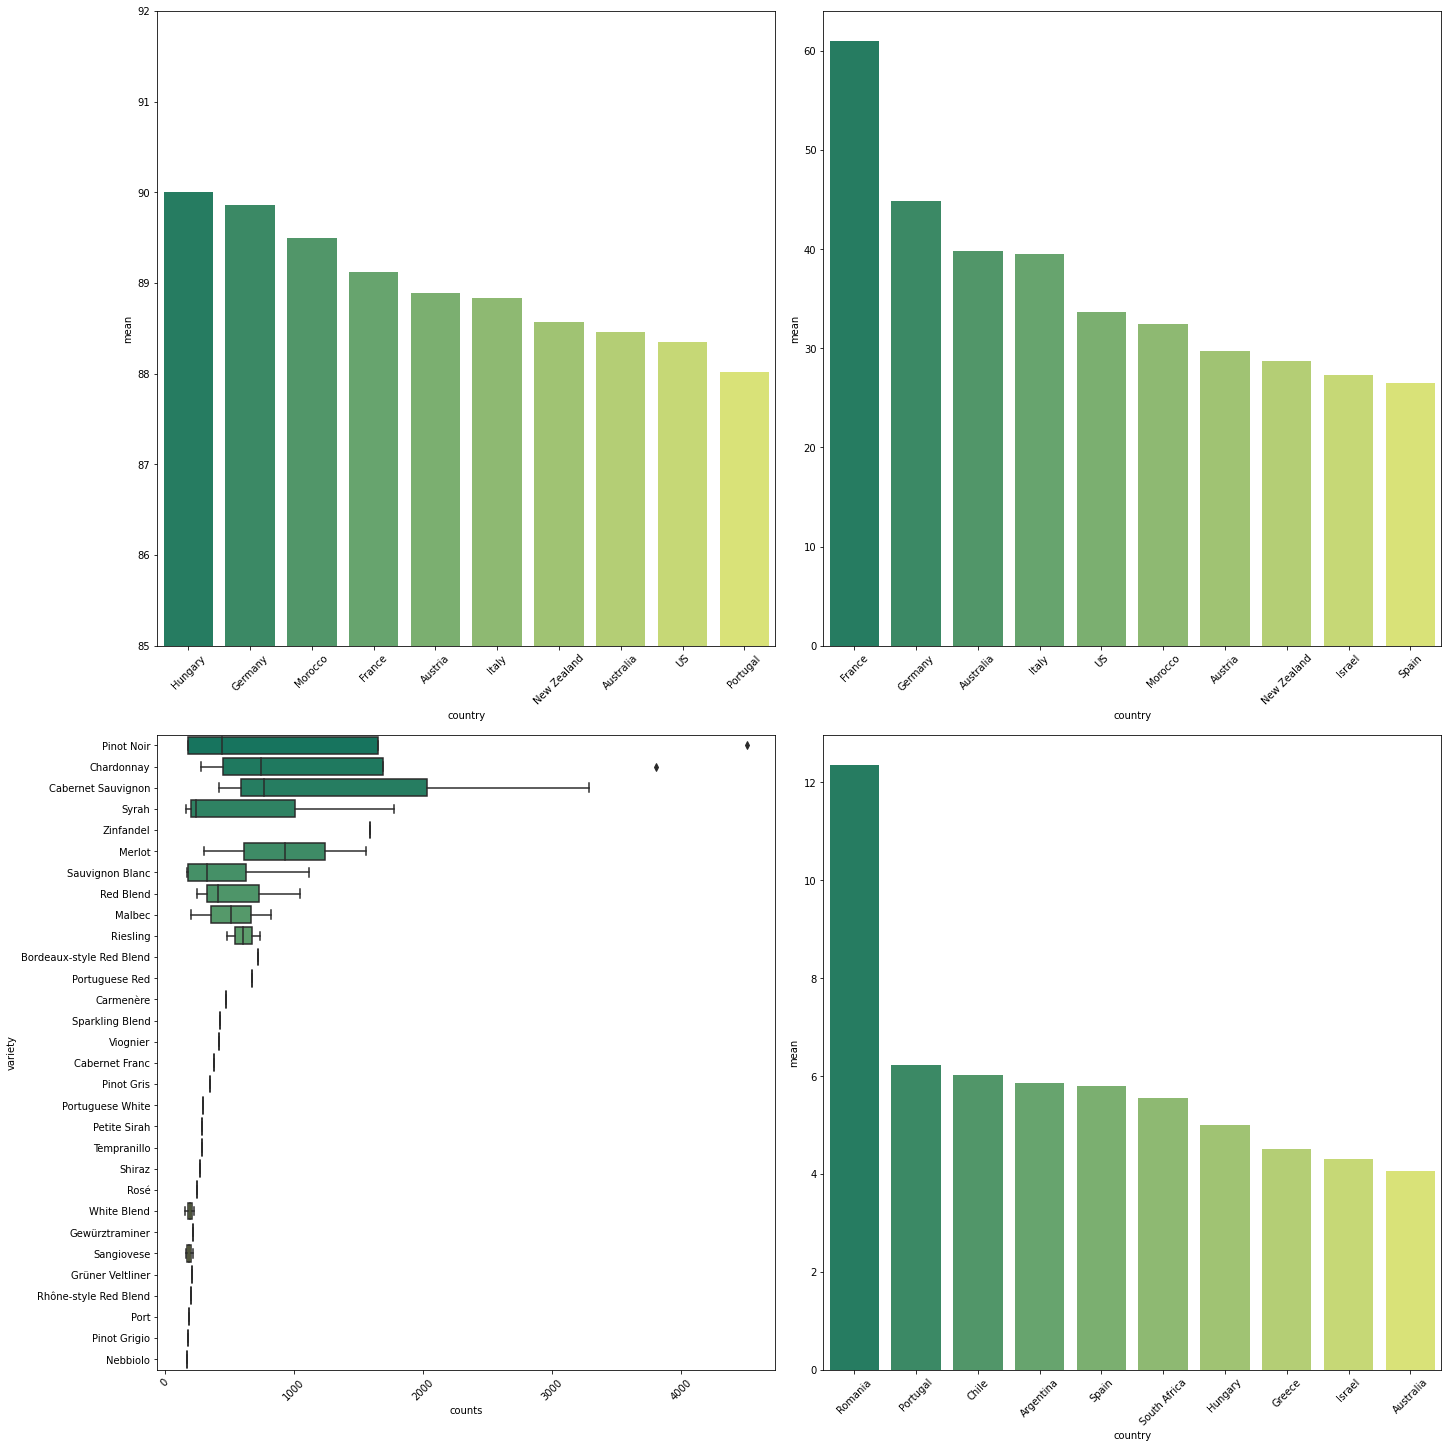

In [14]:
f,ax = plt.subplots(2,1,figsize = (20,20),constrained_layout=True)

plt.subplot(2,2,1)
sns.barplot(data = wn_con_po,x = 'country',y = 'mean',palette='summer')
plt.ylim([85,92])
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data = wn_con_pr, x = 'country',y = 'mean',palette='summer')
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.boxplot(data = wn_con_va, x = 'counts',y = 'variety',palette='summer')
plt.xticks(rotation = 45);

plt.subplot(2,2,4)
sns.barplot(data = wn_con_ef, x = 'country',y = 'mean',palette='summer')
plt.xticks(rotation = 45);

* 미국 주별 평균점수, 가격, 효율성, 품종 개수는 어떻게 되는가

In [15]:
wn_re_us = wn_re[wn_re['country'] == 'US']
wn_re_us

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,efficiency
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.476923
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,0.513514
19,19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell,1.266667
27,27,US,"Focused and dense, this intense wine captures ...",Abetina,94,105.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0.895238
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah,1.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
150873,150873,US,With a color akin to the soft pink of ripe pea...,White,83,7.0,California,Amador County,Sierra Foothills,Zinfandel,Montevina,11.857143
150889,150889,US,A bizarre style of wine. The aromas are Port-l...,Lafond Vineyard,82,35.0,California,Santa Ynez Valley,Central Coast,Pinot Noir,Lafond,2.342857
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro,3.760000
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer,3.100000


In [16]:
wn_pv_po = wn_re_us.groupby(['province'])['points'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)
wn_pv_pr = wn_re_us.groupby(['province'])['price'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)
wn_pv_va = wn_re_us.groupby(['province'])['variety'].value_counts().sort_values(ascending = False).reset_index(name = 'counts').head(50)
wn_pv_ef = wn_re_us.groupby(['province'])['efficiency'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_1720\3887907842.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_1720\3887907842.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


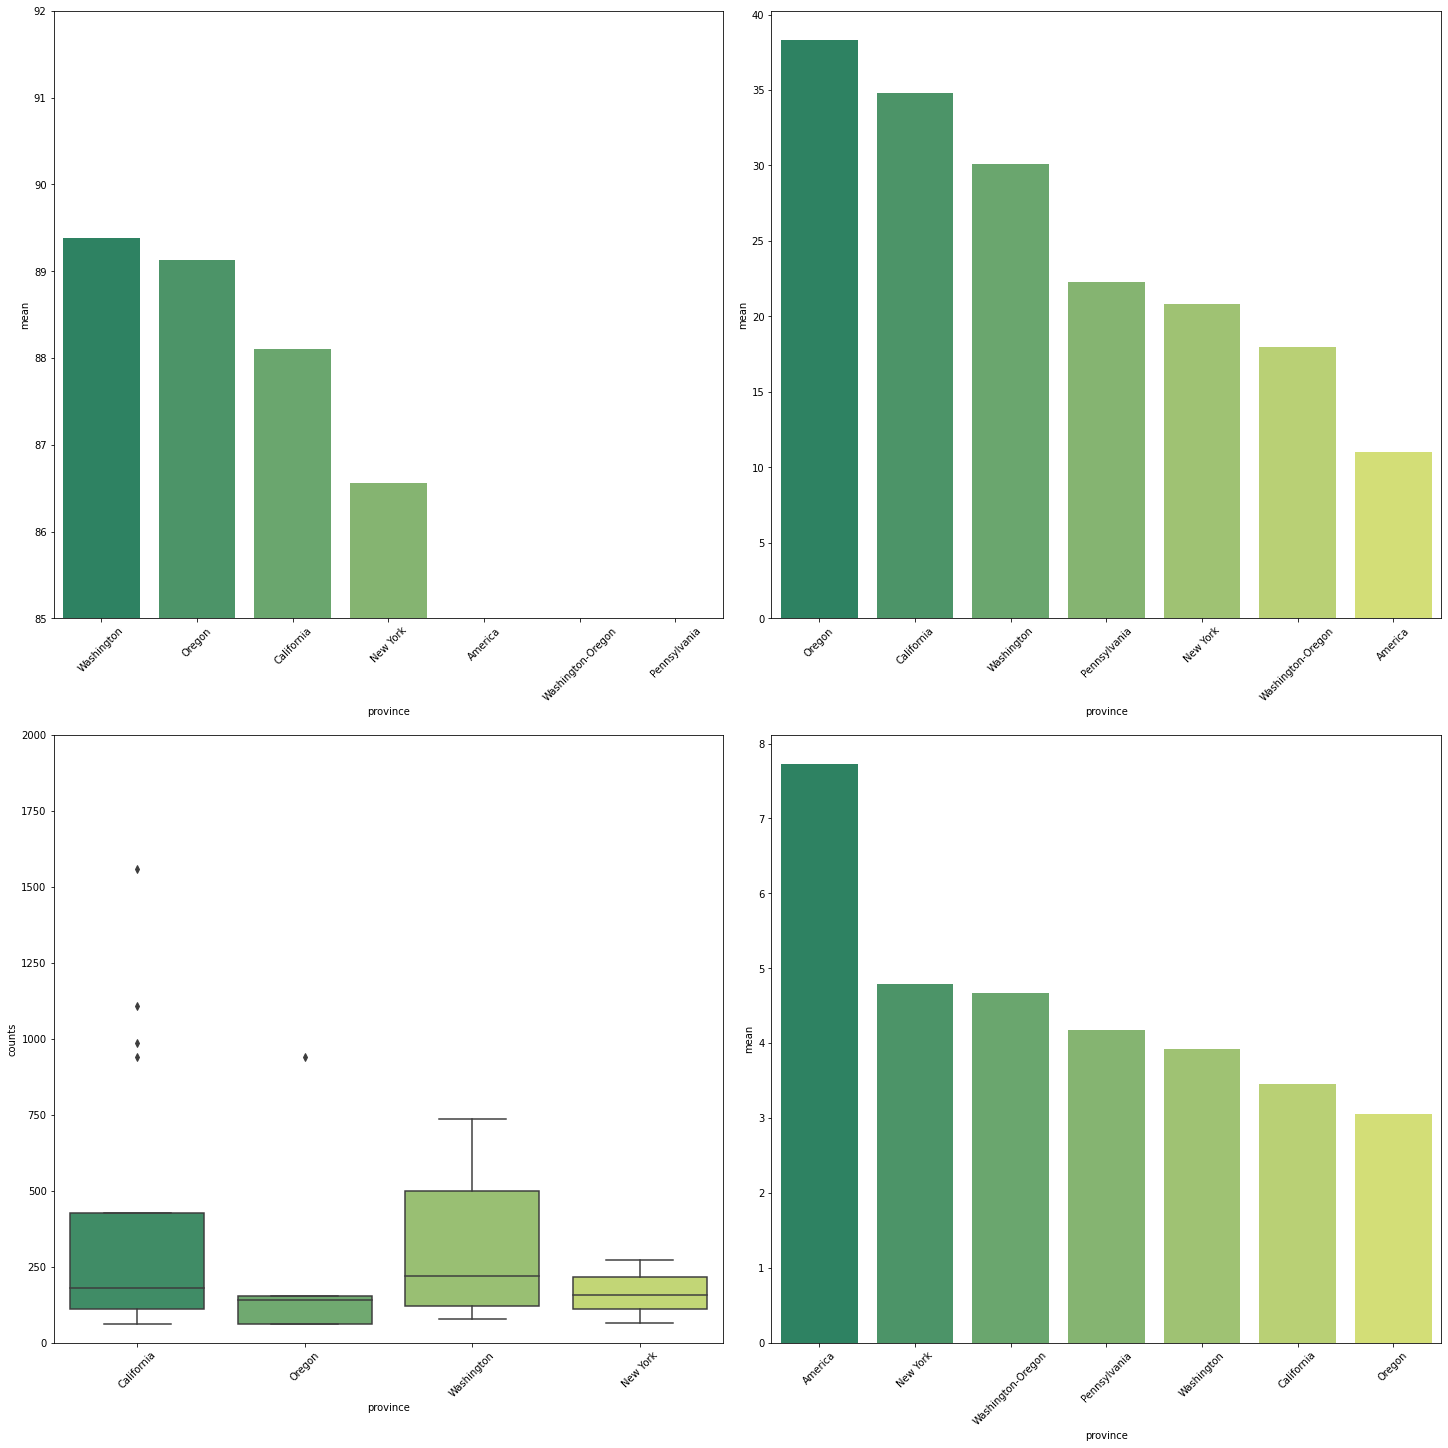

In [17]:
f,ax = plt.subplots(2,1,figsize = (20,20),constrained_layout=True)

plt.subplot(2,2,1)
sns.barplot(data = wn_pv_po,x = 'province',y = 'mean',palette='summer')
plt.ylim([85,92])
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data = wn_pv_pr, x = 'province',y = 'mean',palette='summer')
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.boxplot(data = wn_pv_va, x = 'province',y = 'counts',palette='summer')
plt.ylim([0,2000])
plt.xticks(rotation = 45);

plt.subplot(2,2,4)
sns.barplot(data = wn_pv_ef, x = 'province',y = 'mean',palette='summer')
plt.xticks(rotation = 45);

* 품종별 가격, 점수, 효율은 어떠한가?

In [18]:
wn_va_pr = wn_re.groupby(['variety'])['price'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)
wn_va_po = wn_re.groupby(['variety'])['points'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)
wn_va_ef = wn_re.groupby(['variety'])['efficiency'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)

In [19]:
wn_va_po

,variety,mean
0,Cabernet Franc-Merlot,93.0000
1,Roussanne-Viognier,93.0000
2,Sirica,93.0000
3,Sämling,93.0000
4,Gelber Muskateller,92.0000
5,Nasco,92.0000
6,Sangiovese-Syrah,92.0000
7,Moscato di Noto,92.0000
8,Malbec-Cabernet Franc,92.0000
9,Malbec Blend,92.0000


C:\Users\User\AppData\Local\Temp\ipykernel_1720\1796013341.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_1720\1796013341.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


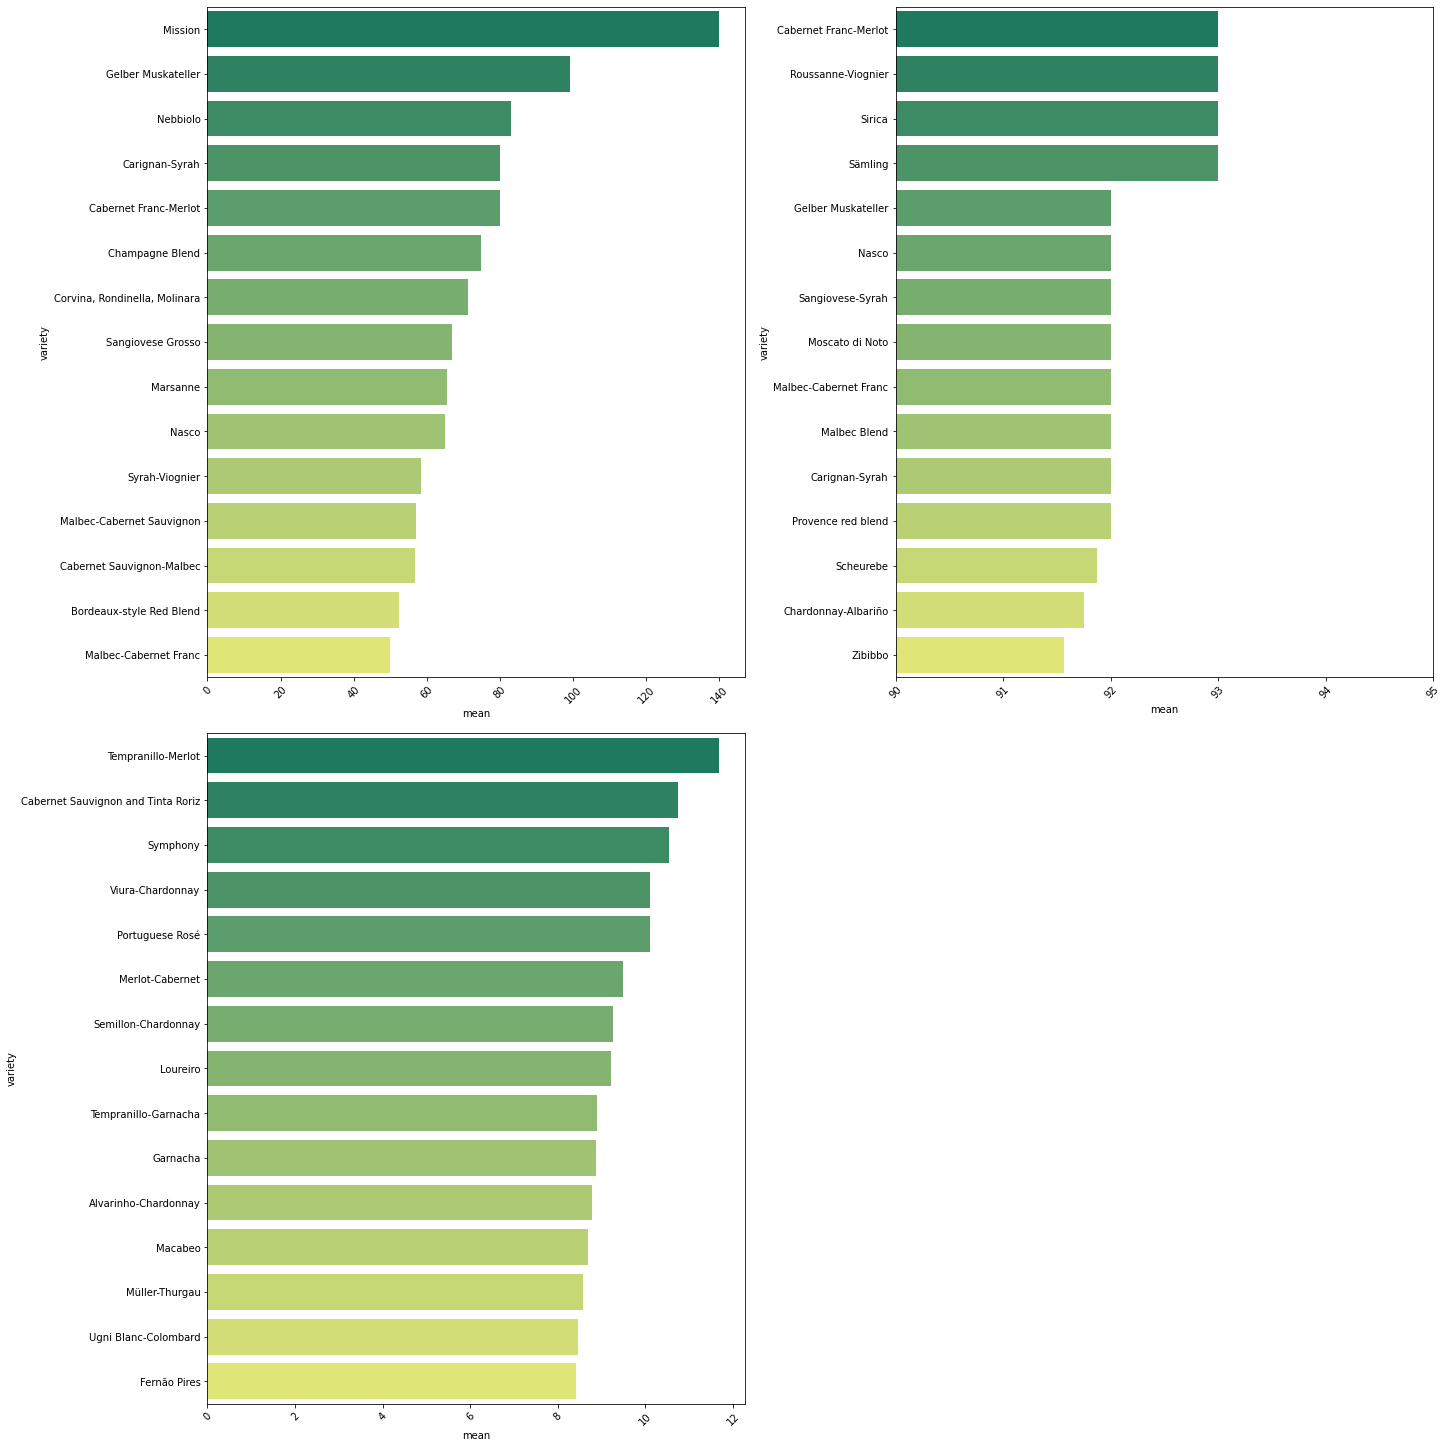

In [20]:
f,ax = plt.subplots(2,1,figsize = (20,20),constrained_layout=True)

plt.subplot(2,2,1)
sns.barplot(data = wn_va_pr,x = 'mean',y = 'variety',palette='summer')
#plt.ylim([85,92])
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data = wn_va_po, x = 'mean',y = 'variety',palette='summer')
plt.xlim([90,95])
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.barplot(data = wn_va_ef, x = 'mean',y = 'variety',palette='summer')
plt.xticks(rotation = 45);

* 와이너리별 점수와 가격, 효율성은 어떻게 되는가

In [21]:
wn_wn_po = wn_re.groupby(['winery'])['points'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)
wn_wn_pr = wn_re.groupby(['winery'])['price'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)
wn_wn_ef = wn_re.groupby(['winery'])['efficiency'].mean().sort_values(ascending = False).reset_index(name = 'mean').head(15)

C:\Users\User\AppData\Local\Temp\ipykernel_1720\1718266750.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_1720\1718266750.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


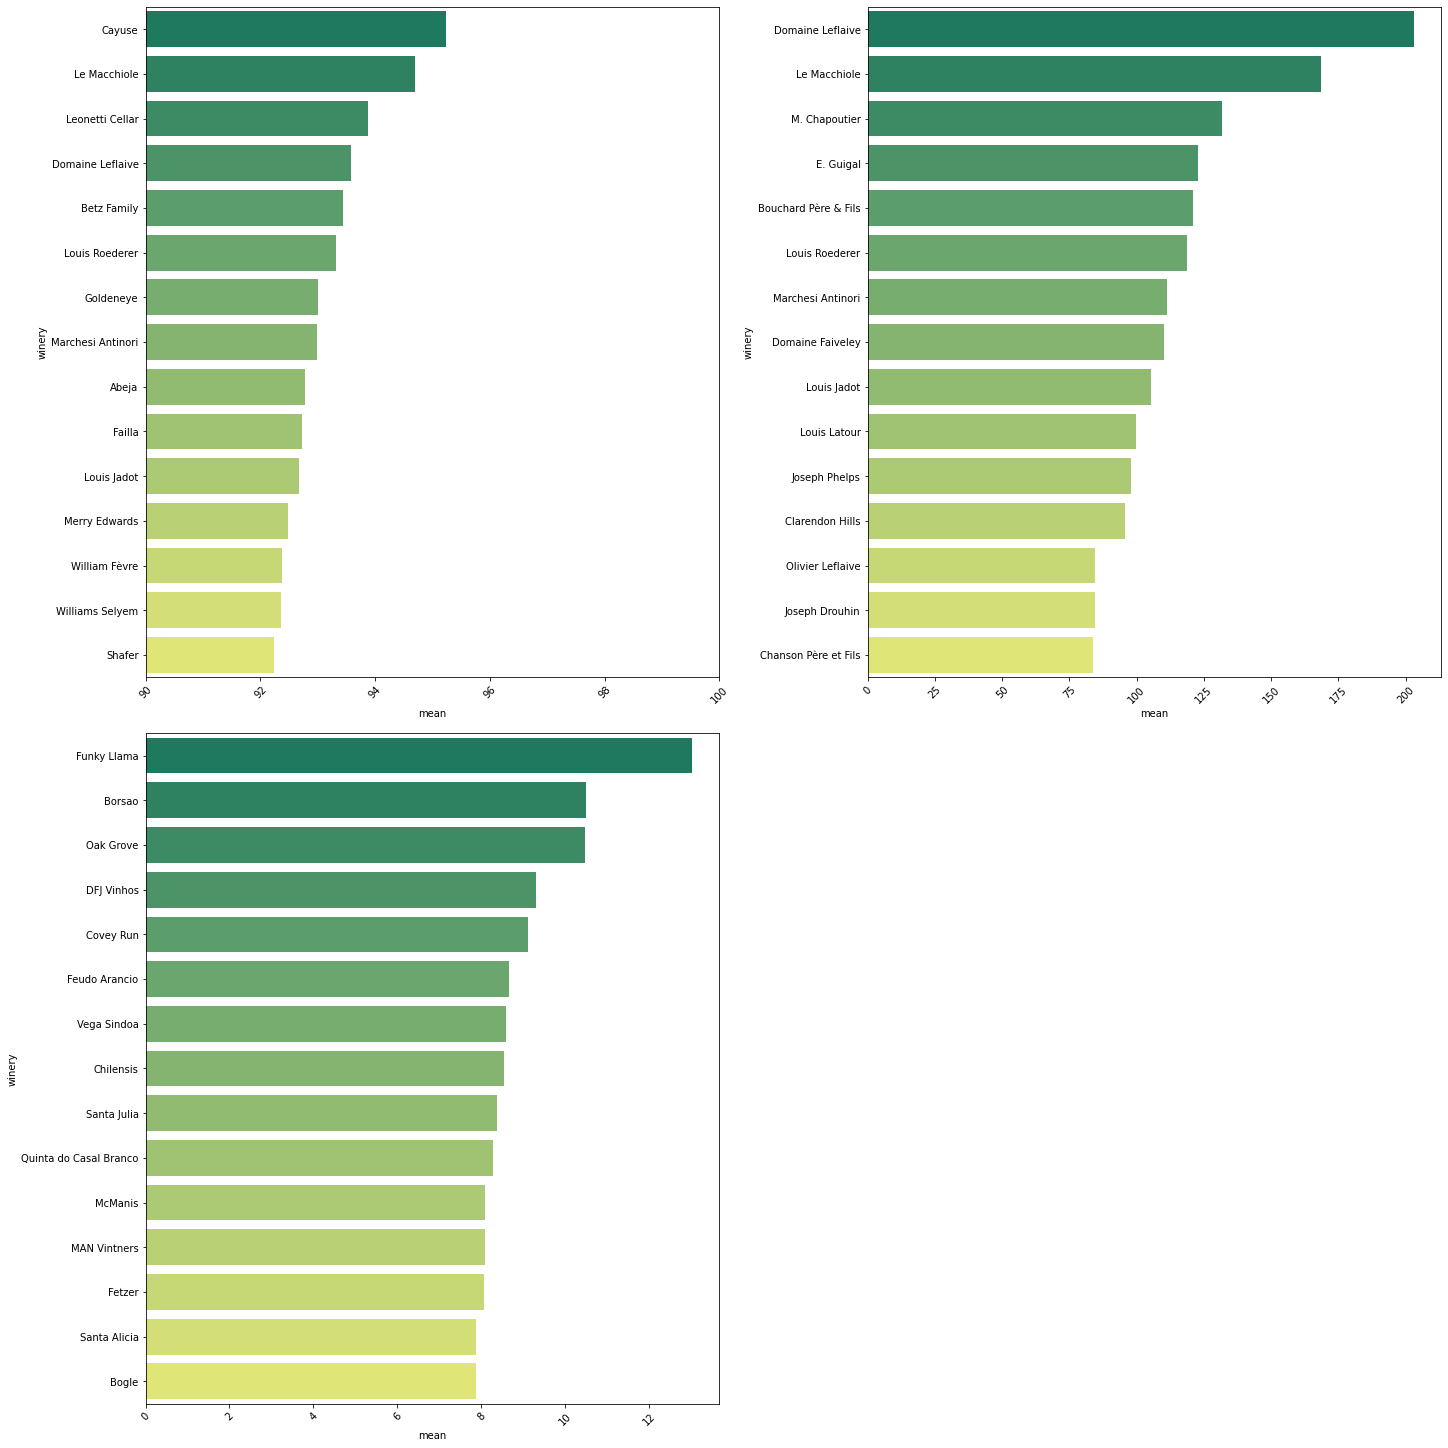

In [22]:
f,ax = plt.subplots(2,1,figsize = (20,20),constrained_layout=True)

plt.subplot(2,2,1)
sns.barplot(data = wn_wn_po,x = 'mean',y = 'winery',palette='summer')
plt.xlim([90,100])
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data = wn_wn_pr, x = 'mean',y = 'winery',palette='summer')
#plt.xlim([90,95])
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.barplot(data = wn_wn_ef, x = 'mean',y = 'winery',palette='summer')
plt.xticks(rotation = 45);

In [30]:
wn_re['description']

3         This spent 20 months in 30% new French oak, an...
14        With its sophisticated mix of mineral, acid an...
19        This fresh and lively medium-bodied wine is be...
21        Alluring, complex and powerful aromas of grill...
25        Yields were down in 2015, but intensity is up,...
                                ...                        
150905    There's not much point in making a reserve-sty...
150914    Old-gold in color, and thick and syrupy. The a...
150915    Decades ago, Beringer’s then-winemaker Myron N...
150916    An impressive wine that presents a full bouque...
150925    Many people feel Fiano represents southern Ita...
Name: description, Length: 43487, dtype: object

In [151]:
!pip install wordcloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 153.1/153.1 KB 2.3 MB/s eta 0:00:00


In [152]:
from wordcloud import WordCloud, STOPWORDS 

In [186]:
text

AttributeError: 'str' object has no attribute 'astype'

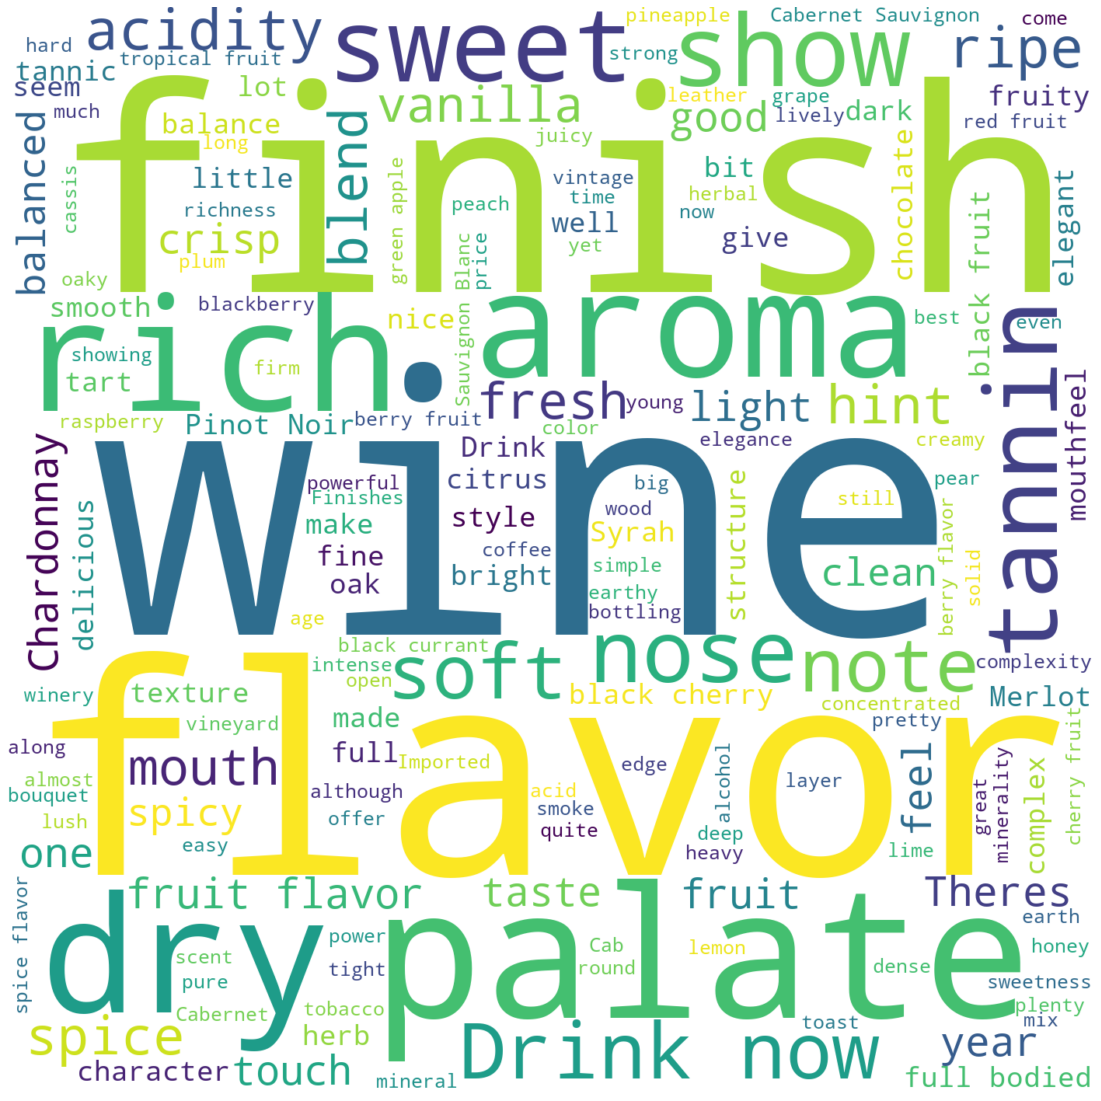

In [153]:

text = str(list(wn_re['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [149]:
wn_re['description'].apply(lambda x: x.replace(',', '').replace('[', '').replace(']', '')).str.split(" ")

3         [This, spent, 20, months, in, 30%, new, French...
14        [With, its, sophisticated, mix, of, mineral, a...
19        [This, fresh, and, lively, medium-bodied, wine...
21        [Alluring, complex, and, powerful, aromas, of,...
25        [Yields, were, down, in, 2015, but, intensity,...
                                ...                        
150905    [There's, not, much, point, in, making, a, res...
150914    [Old-gold, in, color, and, thick, and, syrupy....
150915    [Decades, ago, Beringer’s, then-winemaker, Myr...
150916    [An, impressive, wine, that, presents, a, full...
150925    [Many, people, feel, Fiano, represents, southe...
Name: description, Length: 43487, dtype: object

In [177]:
wn_re['description'].str.split(" ")

3         [This, spent, 20, months, in, 30%, new, French...
14        [With, its, sophisticated, mix, of, mineral,, ...
19        [This, fresh, and, lively, medium-bodied, wine...
21        [Alluring,, complex, and, powerful, aromas, of...
25        [Yields, were, down, in, 2015,, but, intensity...
                                ...                        
150905    [There's, not, much, point, in, making, a, res...
150914    [Old-gold, in, color,, and, thick, and, syrupy...
150915    [Decades, ago,, Beringer’s, then-winemaker, My...
150916    [An, impressive, wine, that, presents, a, full...
150925    [Many, people, feel, Fiano, represents, southe...
Name: description, Length: 43487, dtype: object

In [159]:
import collections

In [178]:
collections.Counter(text)

Counter({'"': 41443,
         'T': 34350,
         'h': 398704,
         'i': 679837,
         's': 577567,
         ' ': 1821131,
         'p': 184437,
         'e': 919655,
         'n': 614127,
         't': 714020,
         '2': 9517,
         '0': 15204,
         'm': 160682,
         'o': 540905,
         '3': 2263,
         '%': 4891,
         'w': 156271,
         'F': 8487,
         'r': 590723,
         'c': 270949,
         'a': 760012,
         'k': 75925,
         'd': 340487,
         'f': 230815,
         'u': 223806,
         'P': 9301,
         'z': 5764,
         'A': 16997,
         'b': 154106,
         'M': 9184,
         'v': 95572,
         'y': 203929,
         'g': 153196,
         'l': 414196,
         'x': 21011,
         'D': 8991,
         'W': 5369,
         'S': 18278,
         'I': 18266,
         'j': 9911,
         '8': 1768,
         '-': 22635,
         'L': 4389,
         'B': 10012,
         'R': 6619,
         '5': 3450,
         'Y': 1419,
      

In [128]:
wn_re_rg = wn_re[['region_2','points']].sort_values(by = 'points',ascending = False).dropna()
wn_re_rg[wn_re_rg['points']> 96].drop_duplicates(['region_2'])

,region_2,points
92916,Napa,100
119194,Oregon Other,100
98647,Sonoma,100
51141,Mendocino/Lake Counties,98
84767,North Coast,98
56726,Columbia Valley,97
17160,Central Coast,97
